# FFT and STFT

## 1. FFT with Sampling Frequency

### 1.1. Implementing FFT routine

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.fftpack import fft, fftshift
from scipy.signal import spectrogram

<center>$x[n]=2cos(2π60t)⟹f=60$</center>

You can think this signal as a vibration signal from a rotating machinery with 60 Hz (or 60  ×  60 = 3600 rpm)

In [2]:
Fs = 2**10              # Sampling frequency                    
T = 1/Fs                # Sampling period (or sampling interval)

N = 5000                # Total data points (signal length)

t = np.arange(0, N)*T   # Time vector (time range)

k = np.arange(0, N)     # vector from 0 to N-1
f = (Fs/N)*k            # frequency range

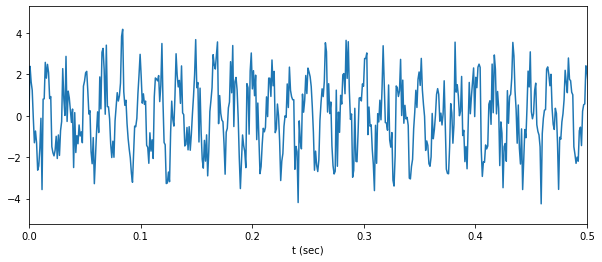

In [3]:
x = 2*np.cos(2*np.pi*60*t) + np.random.randn(N)

plt.figure(figsize = (10, 4))
plt.plot(t, x)
plt.xlim([0, 0.5])
plt.xlabel('t (sec)')
plt.show()

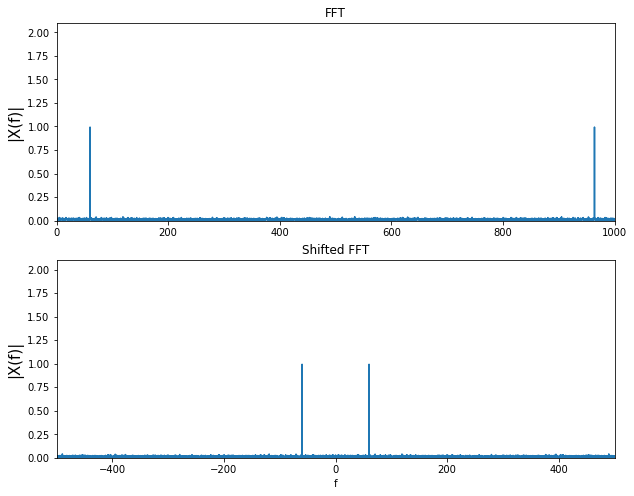

In [4]:
# original fft

xt = fft(x)/N
xtshift = fftshift(xt)

kr = np.hstack([np.arange(0, N/2), np.arange(-N/2, 0)])
fr = (Fs/N)*kr
fs = fftshift(fr)

plt.figure(figsize = (10,8))

plt.subplot(2,1,1)
plt.plot(f, np.abs(xt))
plt.ylabel('|X(f)|', fontsize = 15)
plt.ylim([0, 2.1])
plt.xlim([0, 1000])
plt.title('FFT')

plt.subplot(2,1,2)
plt.plot(fs, np.abs(xtshift))
plt.ylim([0, 2.1])
plt.xlim([-500, 500])
plt.xlabel('f')
plt.ylabel('|X(f)|', fontsize = 15)
plt.title('Shifted FFT')
plt.show()

### 1.2. Single-sided FFT (or Positive FFT)

- Only want the first half of the FFT, since the last is redundant (symmetric)
- 2  ×  amplitude except the DC component

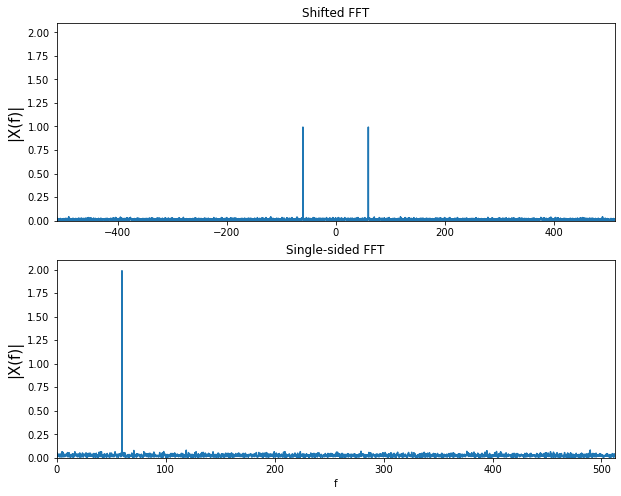

In [5]:
# single-sides fft

xt = fft(x)/N
xtss = xt[0:int(N/2)+1]      # 0:N/2
xtss[1:-1] = 2*xtss[1:-1]

fss = f[0:int(N/2)+1]

plt.figure(figsize = (10,8))
plt.subplot(2,1,1)
plt.plot(fs, np.abs(xtshift))
plt.ylabel('|X(f)|', fontsize = 15)
plt.ylim([0, 2.1])
plt.xlim([np.min(fs), np.max(fs)])
plt.title('Shifted FFT')

plt.subplot(2,1,2)
plt.plot(fss, np.abs(xtss))
plt.xlim([np.min(fss), np.max(fss)])
plt.xlabel('f')
plt.ylabel('|X(f)|', fontsize = 15)
plt.ylim([0, 2.1])
plt.title('Single-sided FFT')
plt.show()

## 2. STFT (Short-Time Fourier Transform)

In [6]:
Fs = 2**10                # Sampling frequency                    
T = 1/Fs                  # Sampling period (or sampling interval)

N = 2*Fs                  # Total data points (signal length)

t = np.arange(0, N)*T     # Time vector (time range)

k = np.arange(0, N)       # vector from 0 to N-1
f = (Fs/N)*k              # frequency range

x1 = np.cos(2*np.pi*50*t)
x2 = np.cos(2*np.pi*100*t)

x = np.zeros(t.shape)
x[0:int(N/2)] = x1[0:int(N/2)]
x[int(N/2):-1] = x2[int(N/2):-1]


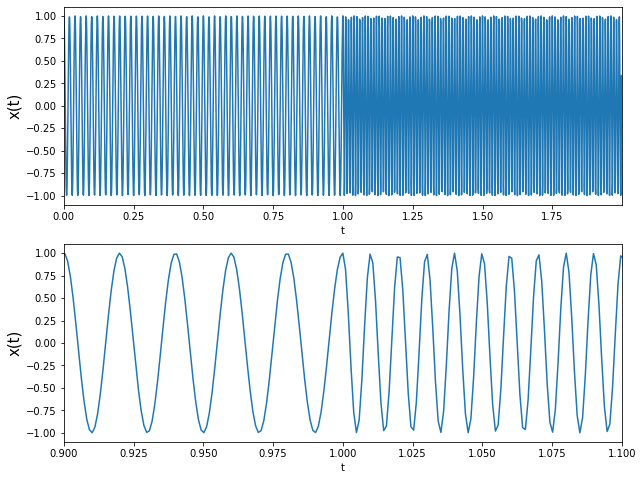

In [7]:
plt.figure(figsize = (10,8))

plt.subplot(2,1,1)
plt.plot(t, x)
plt.xlabel('t')
plt.ylabel('x(t)', fontsize = 15)
plt.xlim([np.min(t), np.max(t)])

plt.subplot(2,1,2)
plt.plot(t, x)
plt.xlim([0.9, 1.1])
plt.xlabel('t')
plt.ylabel('x(t)', fontsize = 15)
plt.show()

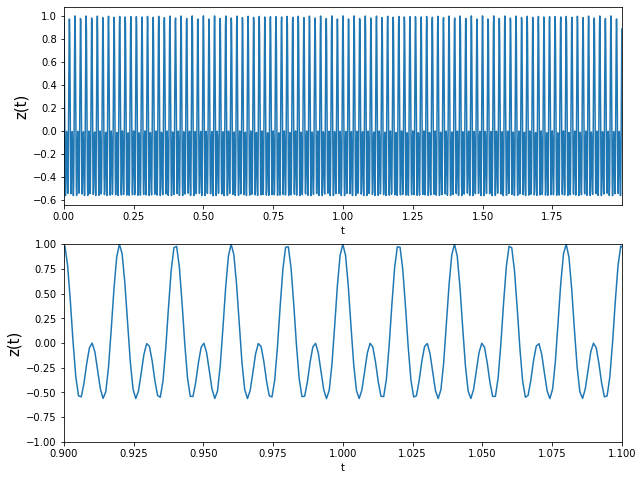

In [8]:
z = 1/2*(x1 + x2)

plt.figure(figsize=(10,8))

plt.subplot(2,1,1)
plt.plot(t, z)
plt.xlabel('t')
plt.ylabel('z(t)', fontsize = 15)
plt.xlim([np.min(t), np.max(t)])

plt.subplot(2,1,2)
plt.plot(t, z)
plt.xlabel('t')
plt.ylabel('z(t)', fontsize = 15)
plt.xlim([0.9,1.1])
plt.ylim([-1,1])
plt.show()

FFT does not provide time information of the signal.

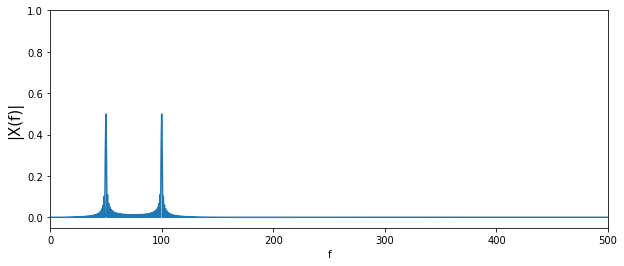

In [9]:
xt = fft(x)/N

xtss = xt[0:int(N/2)+1]
xtss[1:-1] = 2*xtss[1:-1]

fss = f[0:int(N/2)+1]

plt.figure(figsize=(10,4))

plt.plot(fss, np.abs(xtss))
plt.xlim([0, 500])
plt.ylim([-0.05,1])
plt.xlabel('f')
plt.ylabel('|X(f)|', fontsize = 15)
plt.show()

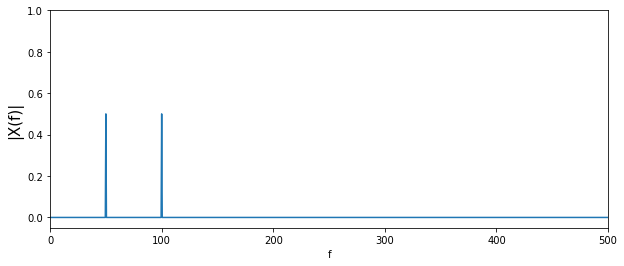

In [10]:
zt = fft(z)/N

ztss = zt[0:int(N/2)+1]
ztss[1:-1] = 2*ztss[1:-1]

fss = f[0:int(N/2)+1]

plt.figure(figsize=(10,4))

plt.plot(fss, np.abs(ztss))
plt.xlim([0, 500])
plt.ylim([-0.05,1])
plt.xlabel('f')
plt.ylabel('|X(f)|', fontsize = 15)
plt.show()

- The spectral content of speech changes over time (non-stationary)
    - As an example, formants change as a function of the spoken phonemes
    - Applying the DFT over a long window does not reveal transitions in spectral content
- To avoid this issue, we apply the DFT over short periods of time
    - For short enough windows, speech can be considered to be stationary
    - Remember, though, that there is a time-frequency tradeoff here!
<center><img src="FFT.png" /></center>

In [11]:
windowsize = 2**7
window = np.hanning(windowsize)
nfft = windowsize
noverlap = windowsize/2

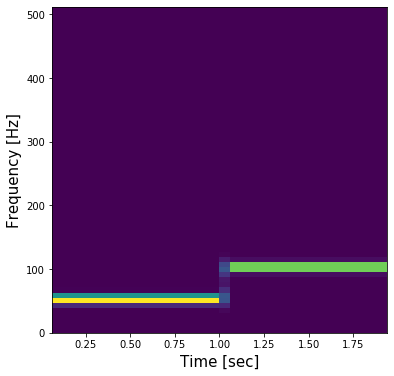

In [12]:
f, t, Sxx = spectrogram(x, 
                        Fs, 
                        window = window, 
                        noverlap = noverlap, 
                        nfft = nfft, 
                        scaling = 'spectrum', 
                        mode = 'psd')

plt.figure(figsize = (6, 6))

plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]', fontsize = 15)
plt.xlabel('Time [sec]', fontsize = 15)
plt.show()

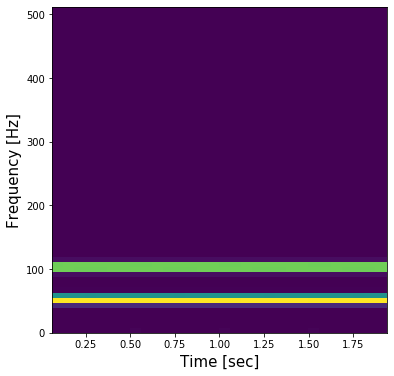

In [13]:
f, t, Szz = spectrogram(z,
                        Fs,
                        window=window,
                        noverlap=noverlap,
                        nfft=nfft,
                        scaling='spectrum',
                        mode='psd')

plt.figure(figsize = (6, 6))

plt.pcolormesh(t, f, Szz)
plt.ylabel('Frequency [Hz]', fontsize = 15)
plt.xlabel('Time [sec]', fontsize = 15)
plt.show()

- STFT resolution trade-off
<center><img src="windows.png" /></center>

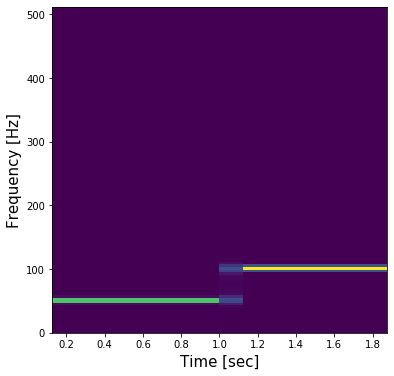

In [14]:
windowsize = 2**8
window = np.hanning(windowsize)
nfft = windowsize
noverlap = windowsize/2

f, t, Sxx = spectrogram(x, Fs, window=window, noverlap=noverlap, nfft=nfft, scaling='spectrum', mode='psd')

plt.figure(figsize = (6, 6))

plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]', fontsize = 15)
plt.xlabel('Time [sec]', fontsize = 15)
plt.show()

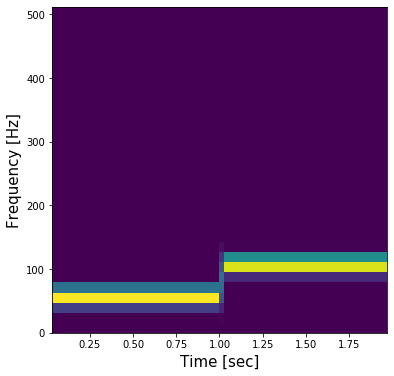

In [15]:
windowsize = 2**6
window = np.hanning(windowsize)
nfft = windowsize
noverlap = windowsize/2

f, t, Sxx = spectrogram(x, Fs, window=window, noverlap=noverlap, nfft=nfft, scaling='spectrum', mode='psd')

plt.figure(figsize = (6, 6))

plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]', fontsize = 15)
plt.xlabel('Time [sec]', fontsize = 15)
plt.show()